## Algorithms for phase retrieval
Simple implementations for 
* ER and HIO

*References:* <br>
- *Fienup [1982](http://ao.osa.org/abstract.cfm?URI=ao-21-15-2758)*<br>

In [73]:
%%capture
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

---
## Input (true images)
Maximum 100% aberrations in both ONLY phase.

In [49]:
coeff1 = [0]*15 #np.random.random(15)
coeff2 = [0,1,0,0,0,1,2,0,2,1.5,2,0,0,0,0]
P1,P_1,F1,F_1 = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                          max_aberA=1.,max_aberP=1.)

#### Oversampling
Zero-pad the pupil plane (object domain) image to for oversampling of 2 (Miao+[1998](http://dx.doi.org/10.1364/JOSAA.15.001662))

In [50]:
test1 = PR(pup=P1,foc=F1,oversamp=2)

---
### Gerchberg-Saxton 
Two-image run. Constraints set by the amplitude (intensity) images in both domains.

_For 1000 iterations_

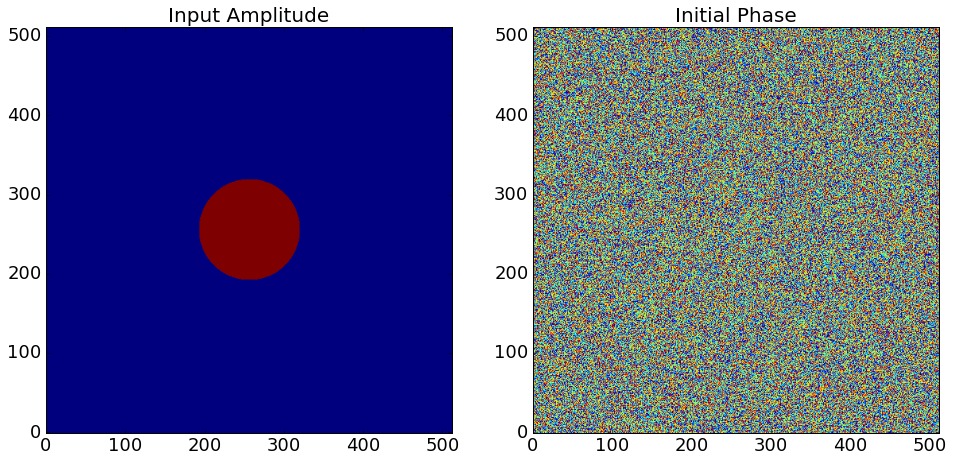

Current step : 100
        Error: 5.99e-05
Current step : 200
        Error: 6.13e-05
Current step : 300
        Error: 5.67e-05
Current step : 400
        Error: 5.60e-05
Current step : 500
        Error: 5.58e-05
Current step : 600
        Error: 5.58e-05
Current step : 700
        Error: 5.58e-05
Current step : 800
        Error: 5.58e-05
Current step : 900
        Error: 5.58e-05
Current step : 1000
        Error: 5.58e-05
Final step : 1000
Final Error: 5.58e-05


In [51]:
test_pup1,test_foc1 = test1.GS()

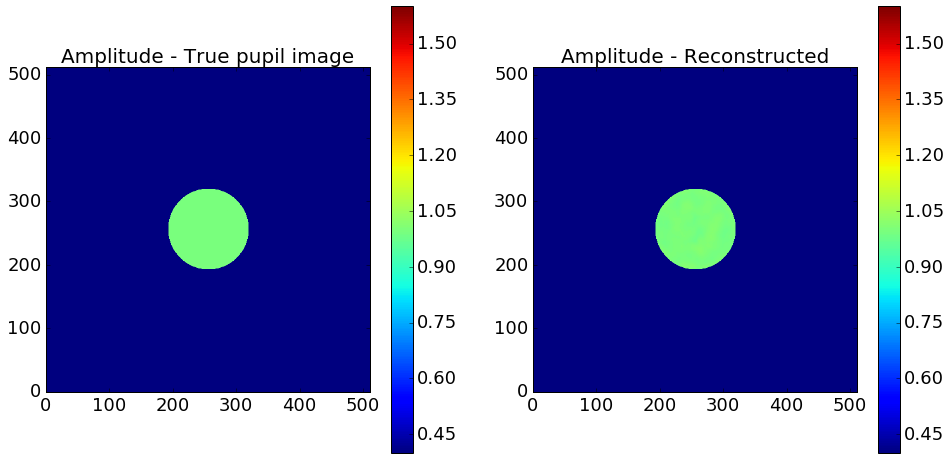

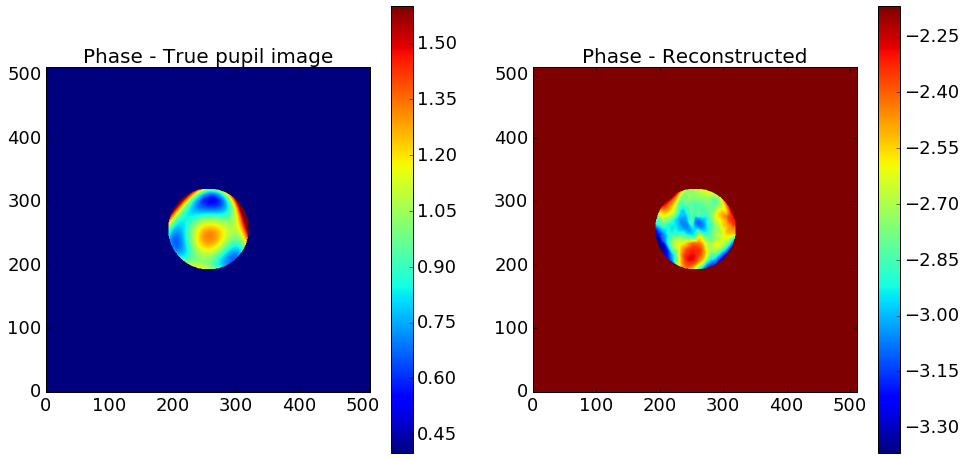

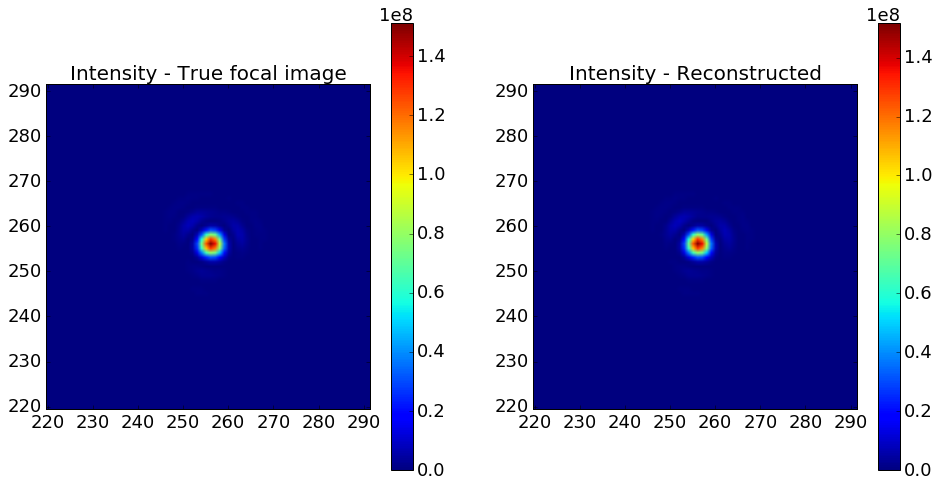

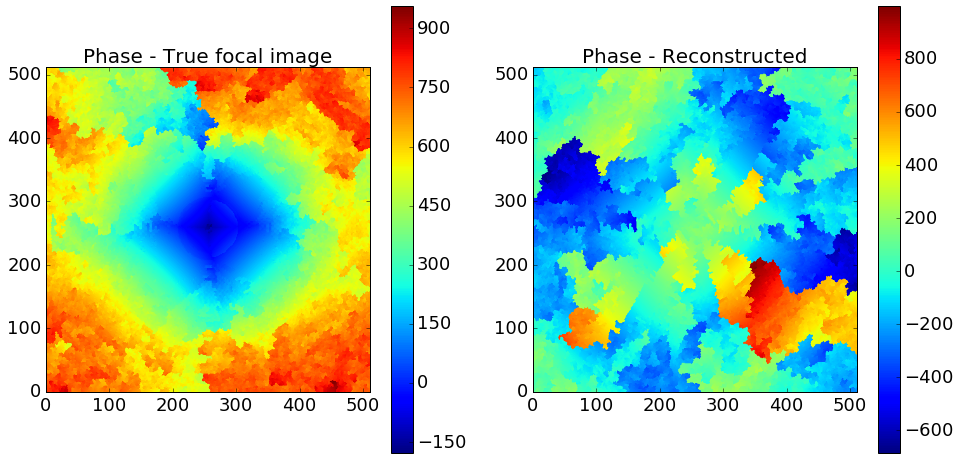

In [52]:
plot_recon(P_1,F_1,test_pup1,test_foc1,recons_clim=True,
           max_abrAmp=.6,max_abrPha=.6)

Quite good. But remember that the phases can have an overall (constant) shift degeneracy. Their differences look like:

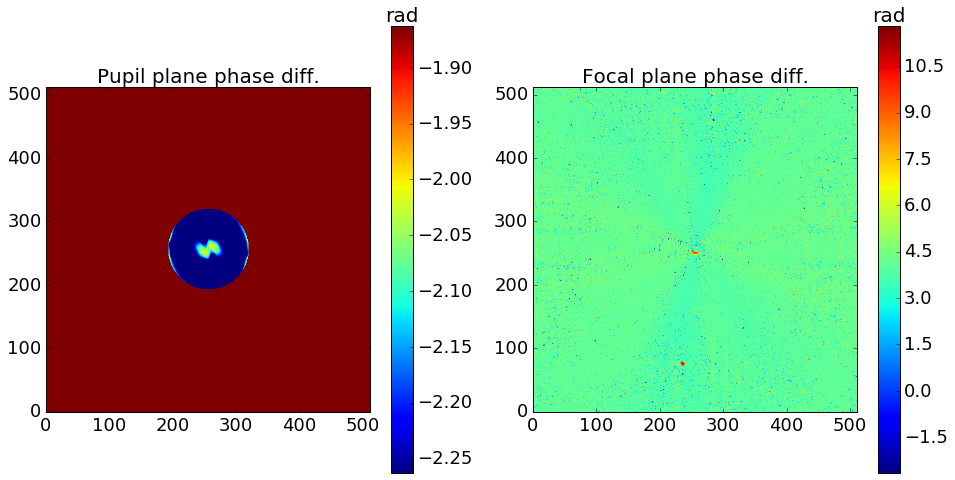

In [53]:
plot_phase_residual(P_1,F_1,test_pup1,test_foc1)

If everything is in the same color, then the process is perfect.

#### Maximum 20%
Does having smaller aberrations help?

In [74]:
P,P_,F,F_ = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2,
                      max_aberA=.2,max_aberP=.2)

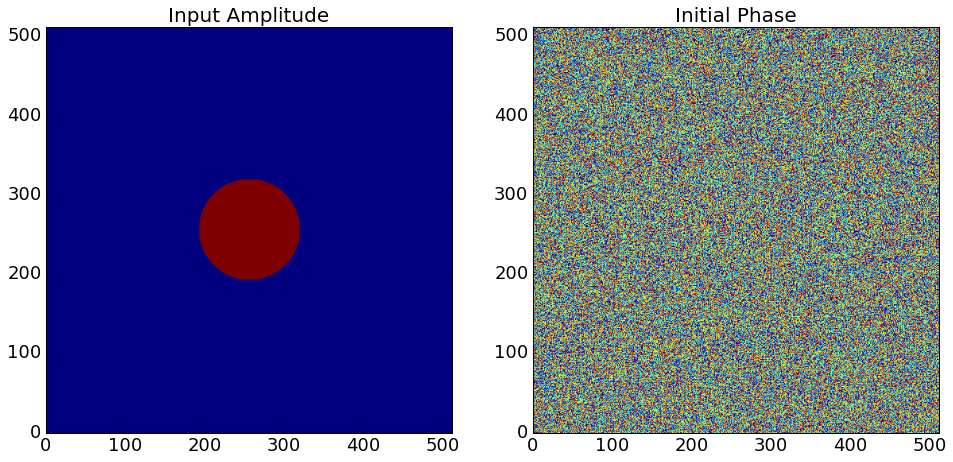

Current step : 100
        Error: 6.92e-06
Current step : 200
        Error: 7.47e-06
Current step : 300
        Error: 7.45e-06
Current step : 400
        Error: 7.42e-06
Current step : 500
        Error: 7.40e-06
Current step : 600
        Error: 7.37e-06
Current step : 700
        Error: 7.35e-06
Current step : 800
        Error: 7.33e-06
Current step : 900
        Error: 7.31e-06
Current step : 1000
        Error: 7.30e-06
Current step : 1100
        Error: 7.28e-06
Current step : 1200
        Error: 7.26e-06
Current step : 1300
        Error: 7.25e-06
Current step : 1400
        Error: 7.24e-06
Current step : 1500
        Error: 7.24e-06
Current step : 1600
        Error: 7.24e-06
Current step : 1700
        Error: 7.24e-06
Current step : 1800
        Error: 7.23e-06
Current step : 1900
        Error: 7.23e-06
Current step : 2000
        Error: 7.23e-06
Final step : 2000
Final Error: 7.23e-06


In [75]:
test = PR(pup=P,foc=F,oversamp=2)
test_pup,test_foc = test.GS(iterlim=2000)

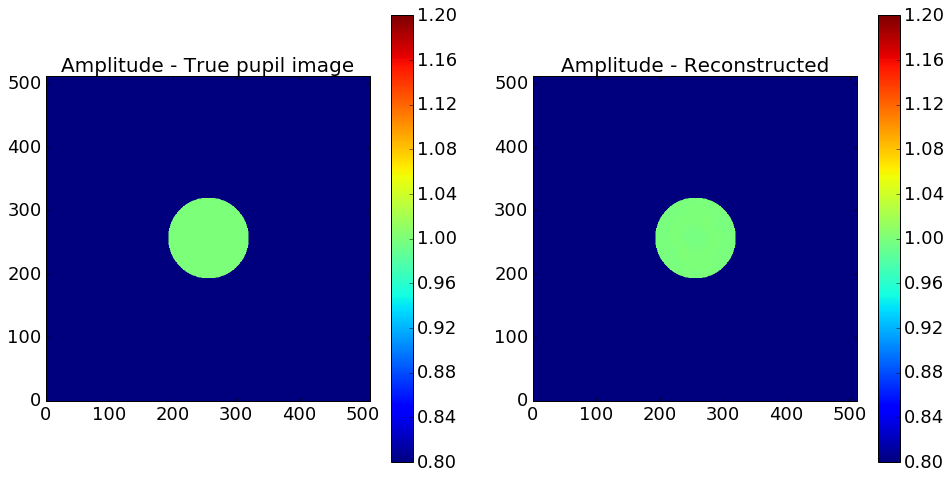

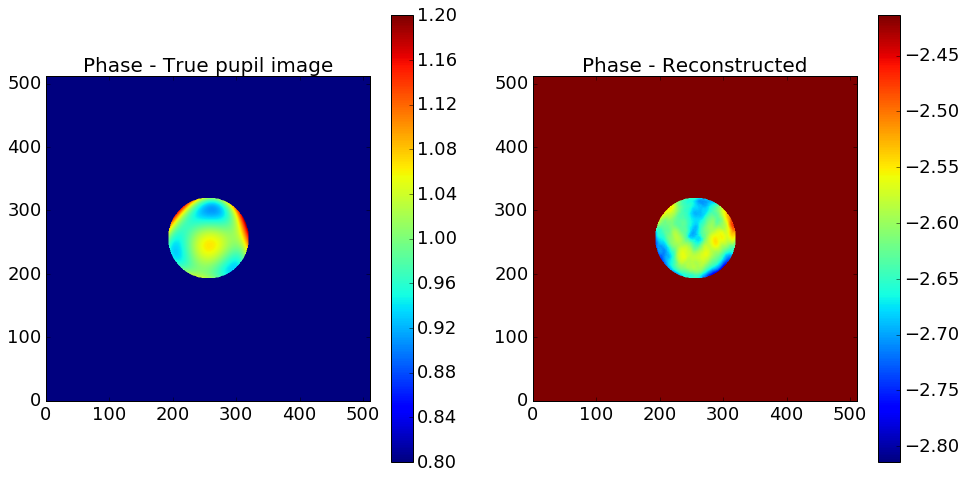

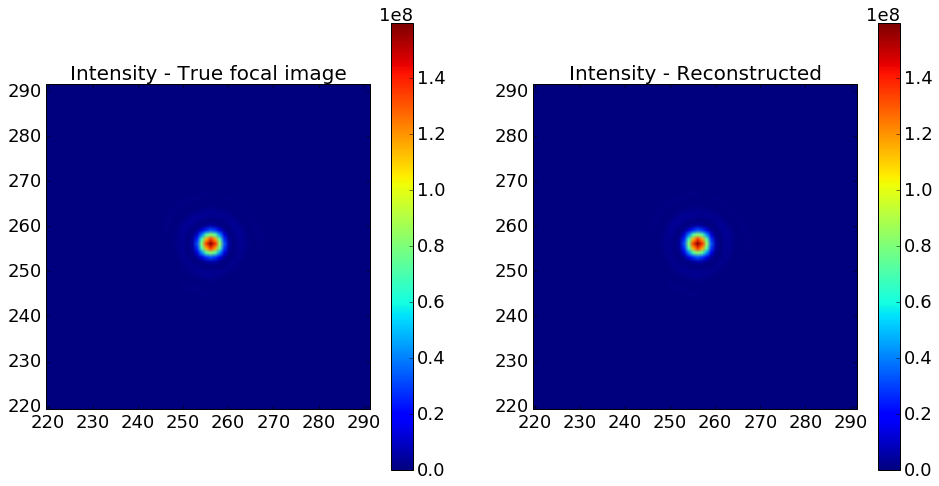

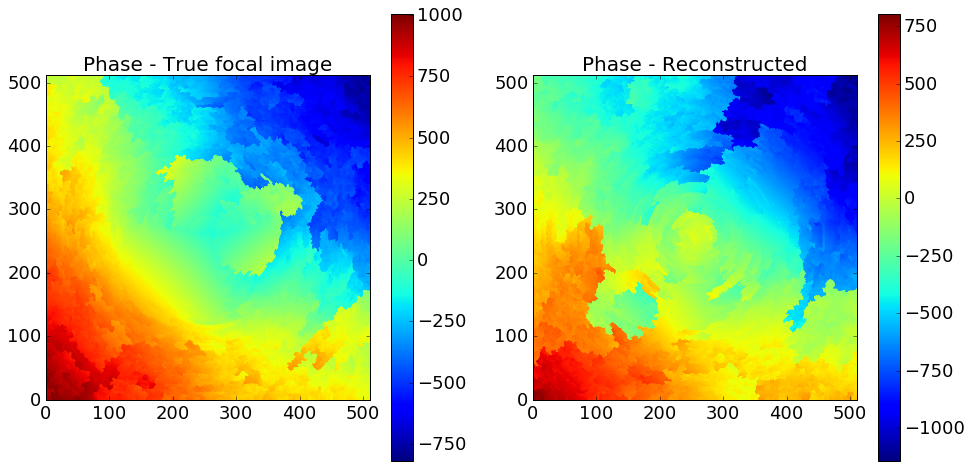

In [76]:
plot_recon(P_,F_,test_pup,test_foc,recons_clim=True)

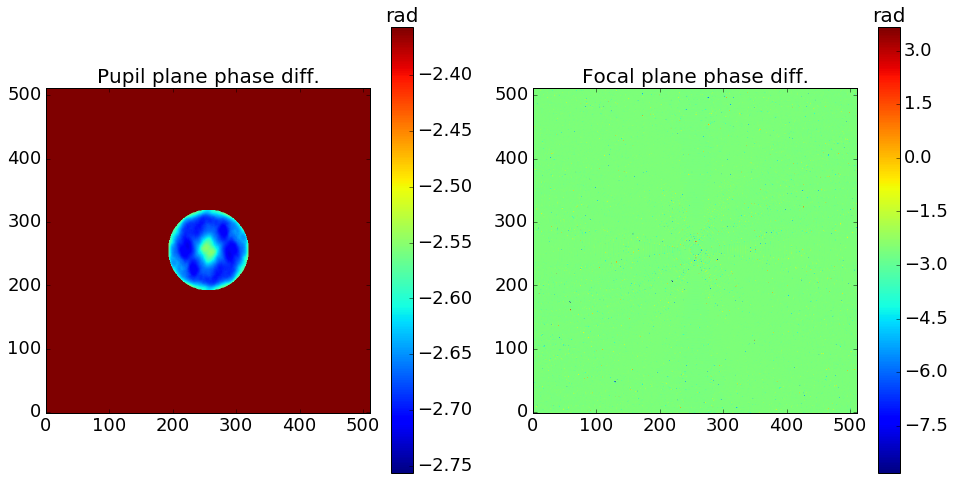

In [77]:
plot_phase_residual(P_,F_,test_pup,test_foc)

Hard to tell which (larger or smaller aberrations) is more suitable for the algorithm

---
### ER
Maximum number of iterations: 1000.
Without any positivity constraints (only support defined by the aperture)

Caution: Pupil image is not used for constraints.
         This is one-image process.


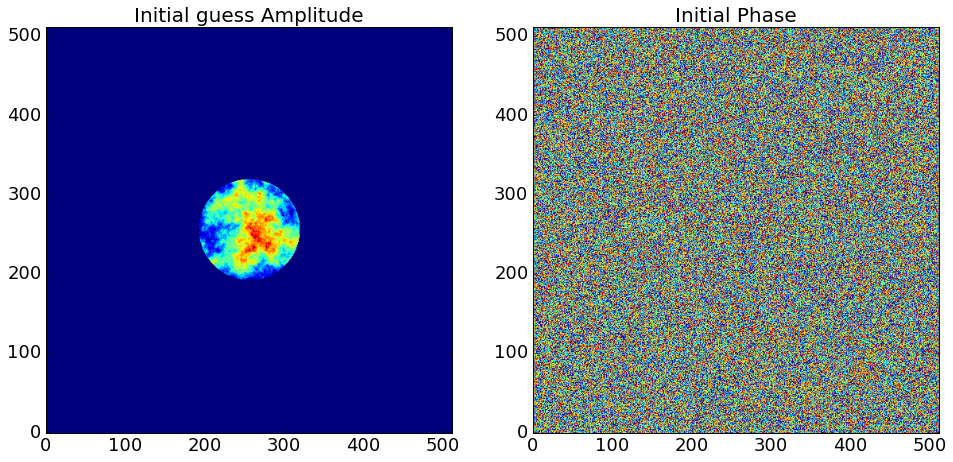

Current step : 100
        Error: 2.58e-05
Current step : 200
        Error: 2.29e-05
Current step : 300
        Error: 2.21e-05
Current step : 400
        Error: 2.13e-05
Current step : 500
        Error: 2.12e-05
Current step : 600
        Error: 2.11e-05
Current step : 700
        Error: 2.10e-05
Current step : 800
        Error: 2.10e-05
Current step : 900
        Error: 2.10e-05
Current step : 1000
        Error: 2.10e-05
-----------------------
First iteration error: 1.13e-02
Final step : 1000
Final Error: 2.10e-05


In [58]:
ER_pup,ER_foc,ER_errlist = test.ER(iterlim=1000)

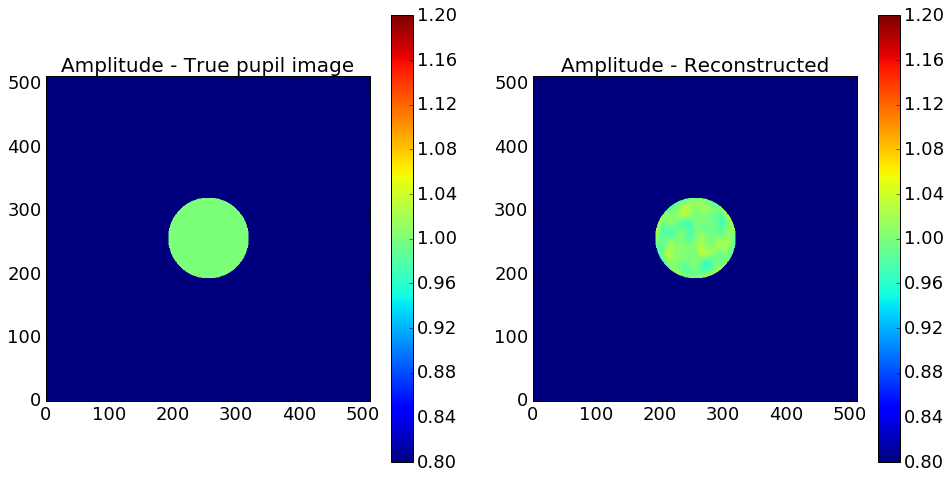

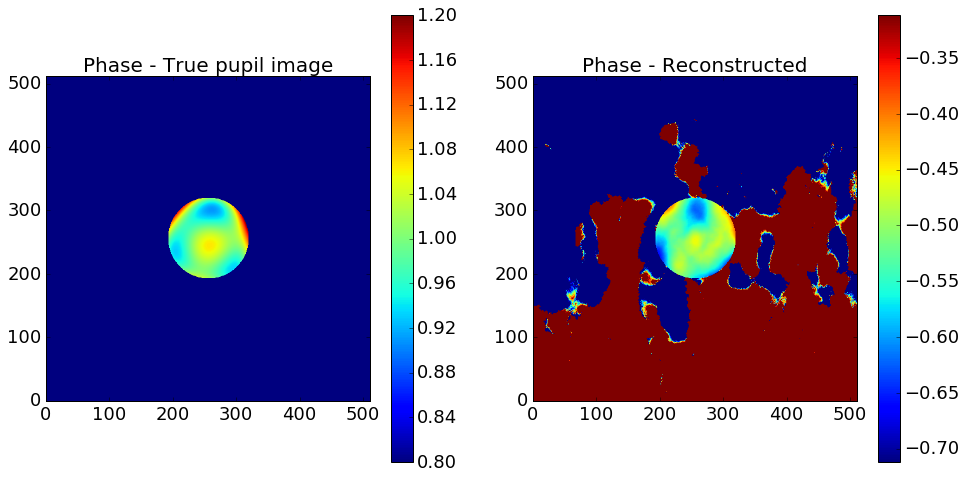

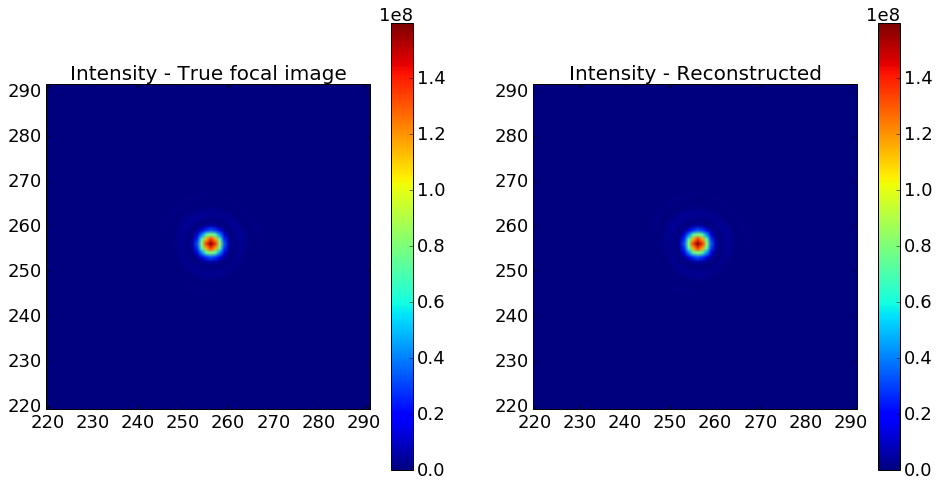

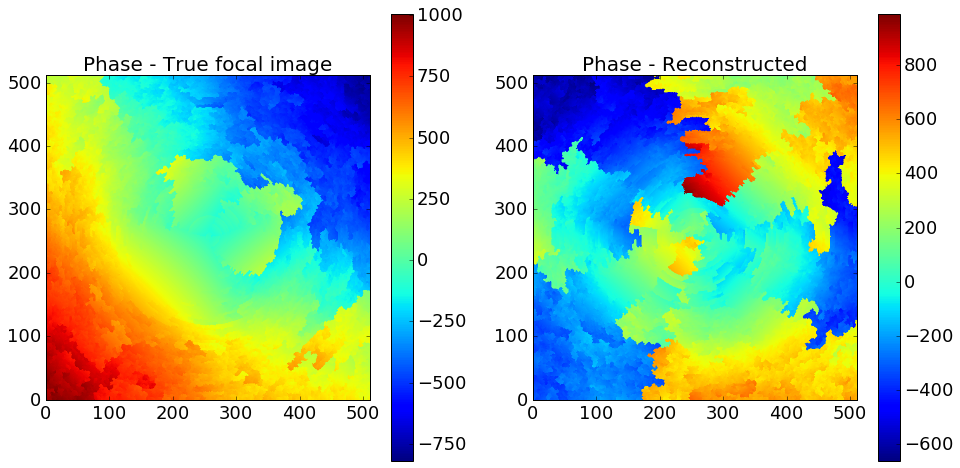

In [71]:
plot_recon(P_,F_,ER_pup,ER_foc,recons_clim=True)

It clearly does not fully recover the "true" images, as some small regions show very inconsistent colors between the left and right panels. But far better than GS, which is quite amazing...

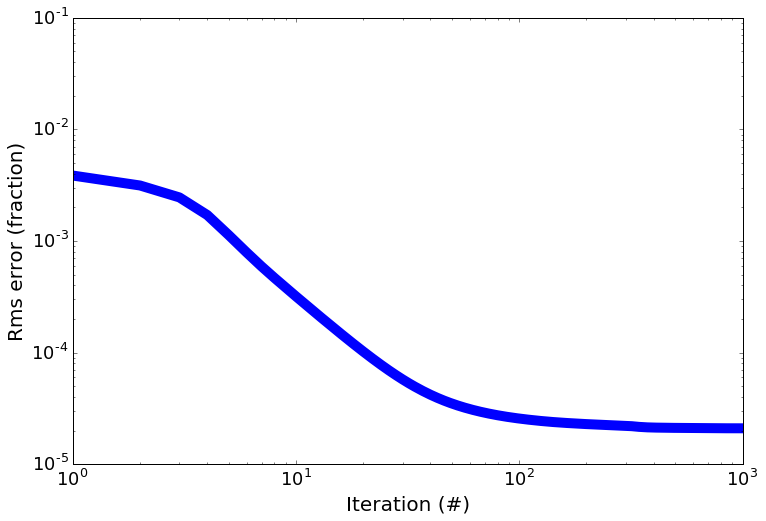

In [60]:
plot_errlist(ER_errlist)

---
### HIO
Same settings as ER
#### 1.  $\beta$= 0.5

Caution: Pupil image is not used for constraints.
         This is one-image process.


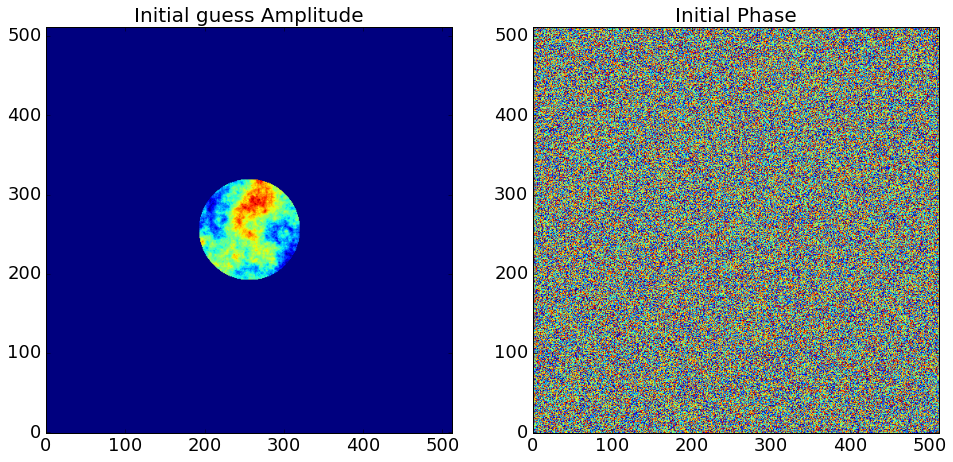

Current step : 100
        Error: 1.54e-03
Current step : 200
        Error: 1.46e-03
Current step : 300
        Error: 1.43e-03
Current step : 400
        Error: 1.41e-03
Current step : 500
        Error: 1.39e-03
Current step : 600
        Error: 1.38e-03
Current step : 700
        Error: 1.37e-03
Current step : 800
        Error: 1.37e-03
Current step : 900
        Error: 1.36e-03
Current step : 1000
        Error: 1.36e-03
-----------------------
First iteration error: 1.06e-02
Final step : 1000
Final Error: 1.36e-03


In [78]:
HIO_pup,HIO_foc,HIO_errlist = test.HIO(beta=0.5,iterlim=1000)

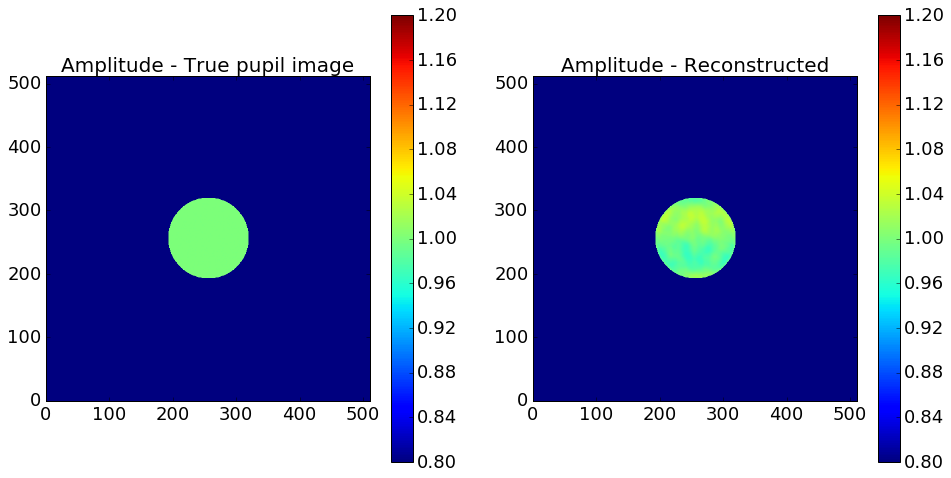

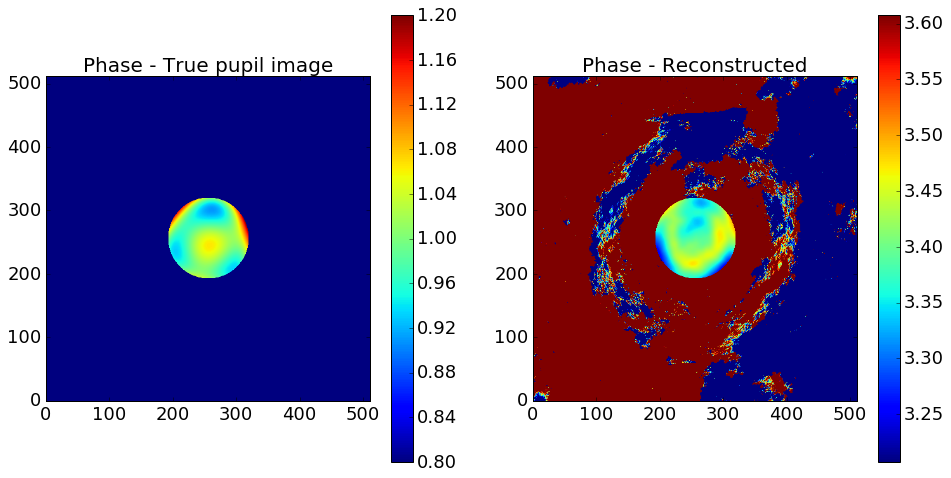

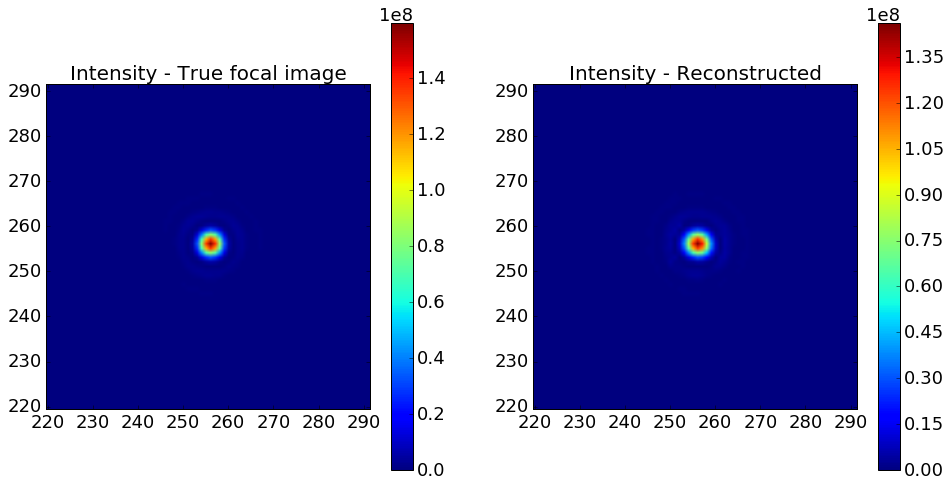

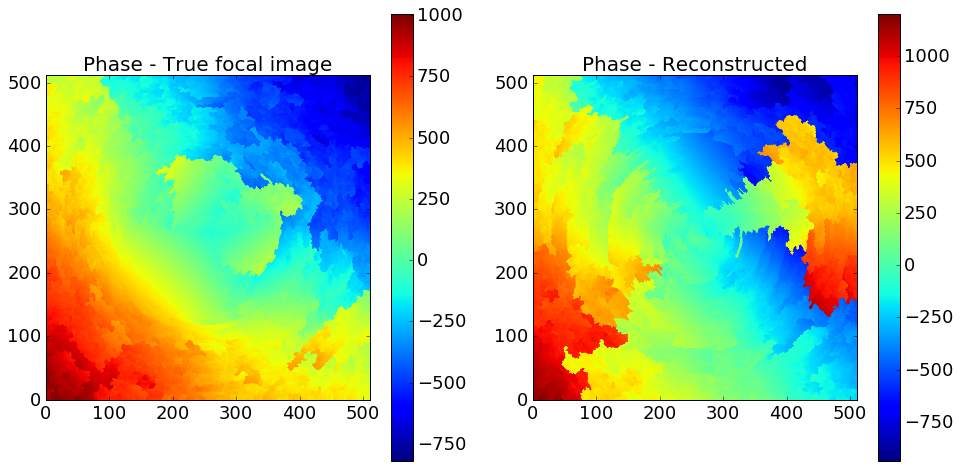

In [97]:
plot_recon(P_,F_,HIO_pup,HIO_foc,recons_clim=True)

Okay, looks like it jumped out from some valley and failed to converge well:

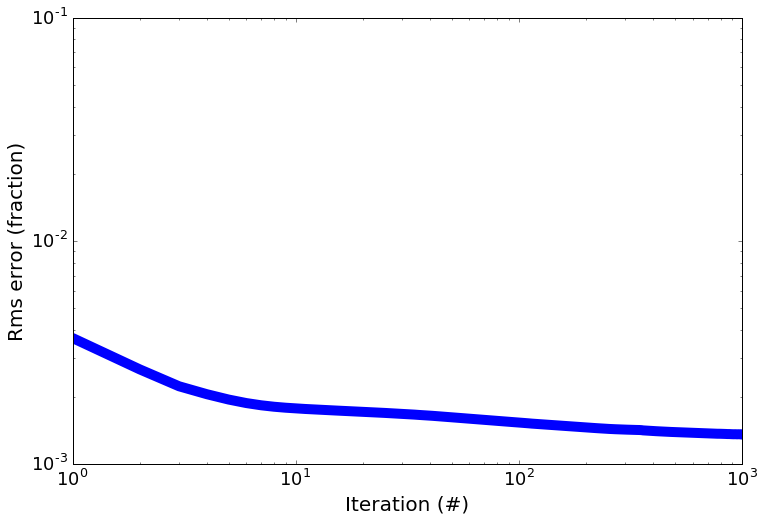

In [80]:
plot_errlist(HIO_errlist)

We shall try other $\beta$ choices:

#### 2. $\beta$ = 1

Caution: Pupil image is not used for constraints.
         This is one-image process.


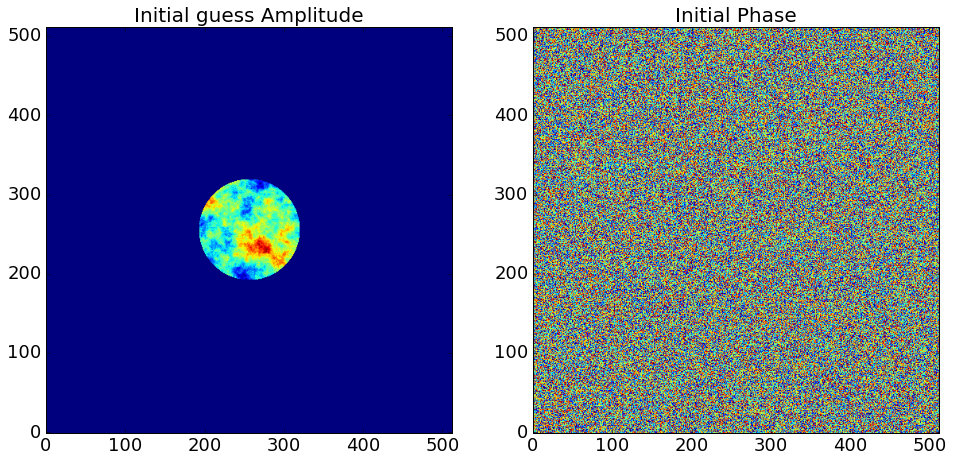

Current step : 100
        Error: 3.73e-03
Current step : 200
        Error: 3.44e-03
Current step : 300
        Error: 3.27e-03
Current step : 400
        Error: 3.18e-03
Current step : 500
        Error: 3.11e-03
Current step : 600
        Error: 3.07e-03
Current step : 700
        Error: 3.03e-03
Current step : 800
        Error: 3.01e-03
Current step : 900
        Error: 2.99e-03
Current step : 1000
        Error: 2.97e-03
-----------------------
First iteration error: 1.11e-02
Final step : 1000
Final Error: 2.97e-03


In [81]:
HIO_pup_1,HIO_foc_1,HIO_errlist_1 = test.HIO(beta=1.,iterlim=1000)

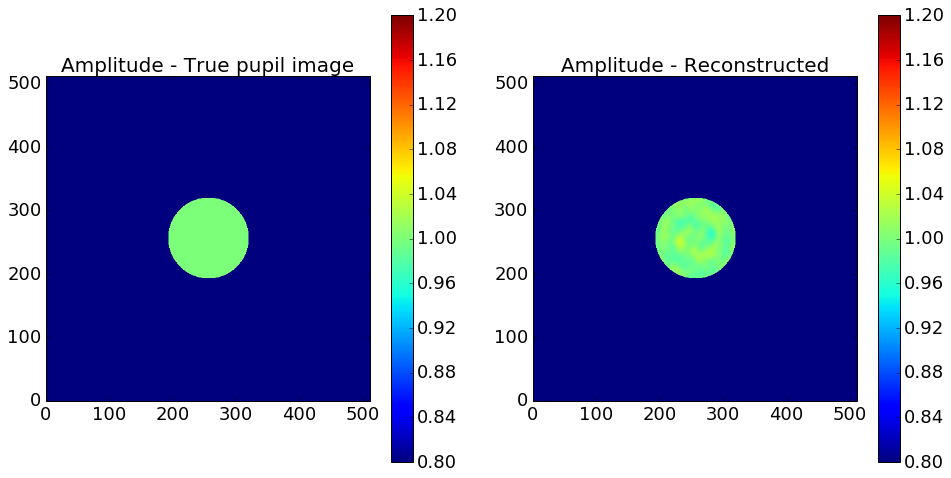

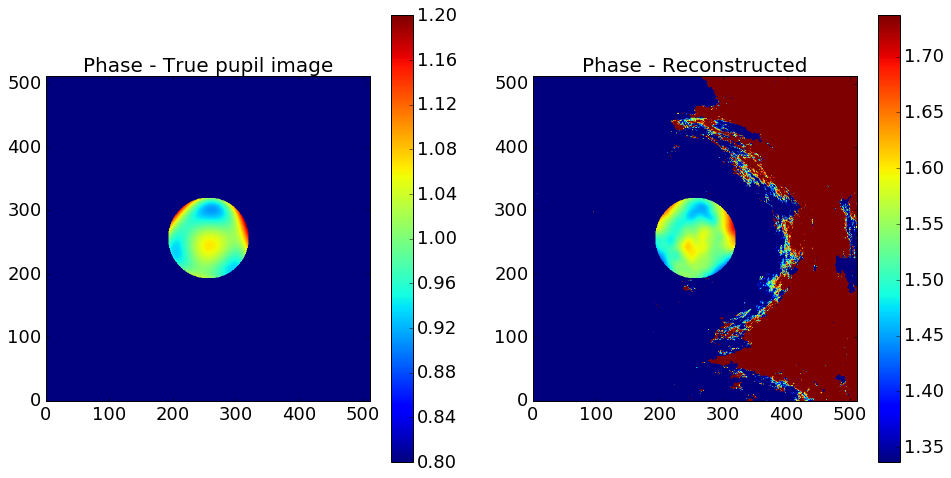

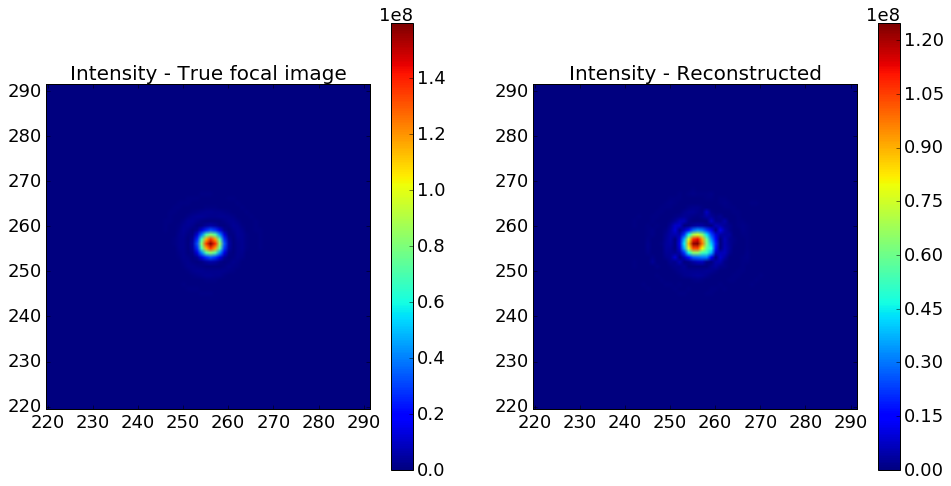

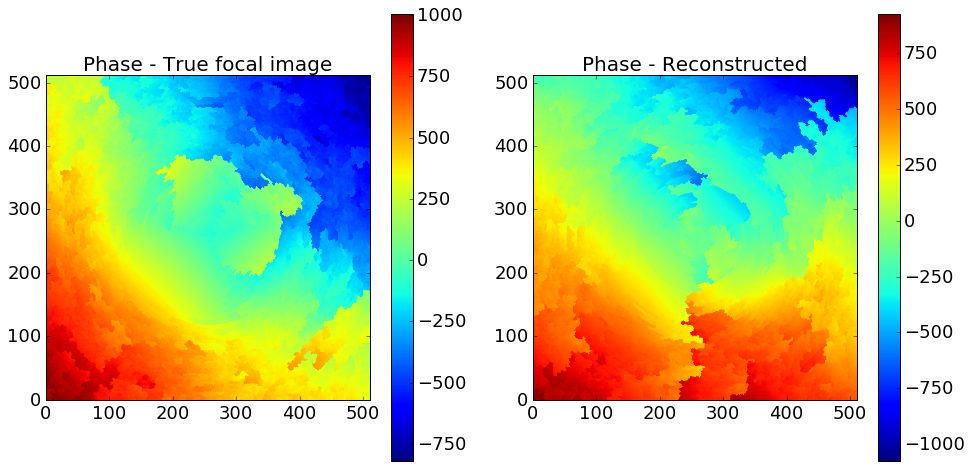

In [91]:
plot_recon(P_,F_,HIO_pup_1,HIO_foc_1,recons_clim=True)

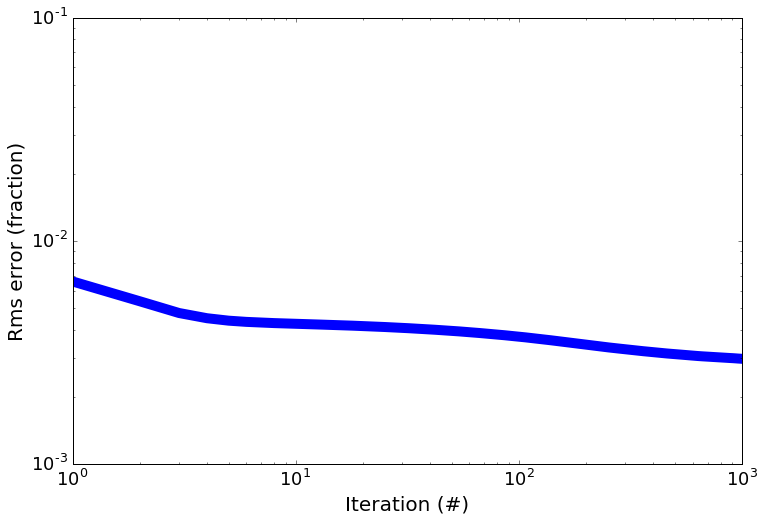

In [92]:
plot_errlist(HIO_errlist_1)

Intriguing. Error seems to be finding its way to a second convergence (decending trend), while the amplitude was already reconstructed pretty well. The errors most likely come from the "outside of support" region. How about a moderate $\beta$?

#### 3. $\beta$ = 0.7

Caution: Pupil image is not used for constraints.
         This is one-image process.


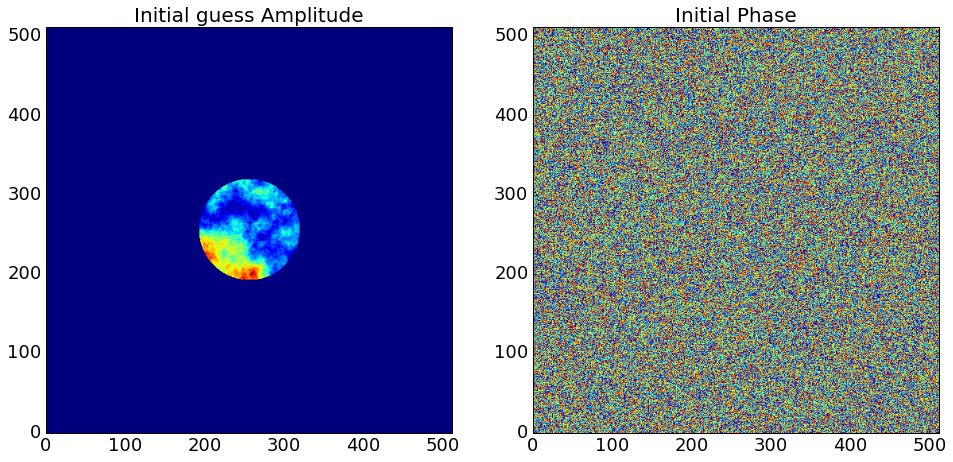

Current step : 100
        Error: 3.72e-03
Current step : 200
        Error: 3.46e-03
Current step : 300
        Error: 3.27e-03
Current step : 400
        Error: 3.12e-03
Current step : 500
        Error: 3.02e-03
Current step : 600
        Error: 2.96e-03
Current step : 700
        Error: 2.91e-03
Current step : 800
        Error: 2.88e-03
Current step : 900
        Error: 2.86e-03
Current step : 1000
        Error: 2.84e-03
-----------------------
First iteration error: 1.16e-02
Final step : 1000
Final Error: 2.84e-03


In [93]:
HIO_pup_07,HIO_foc_07,HIO_errlist_07 = test.HIO(beta=.7,iterlim=1000)

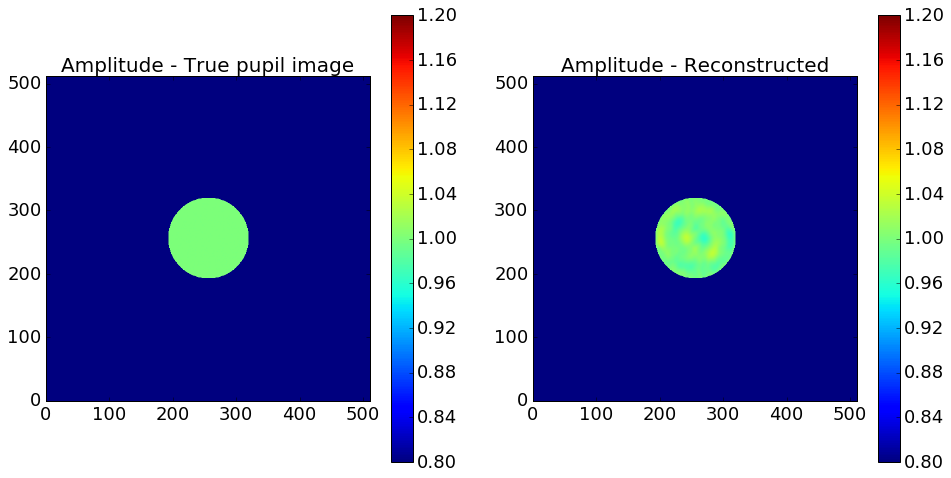

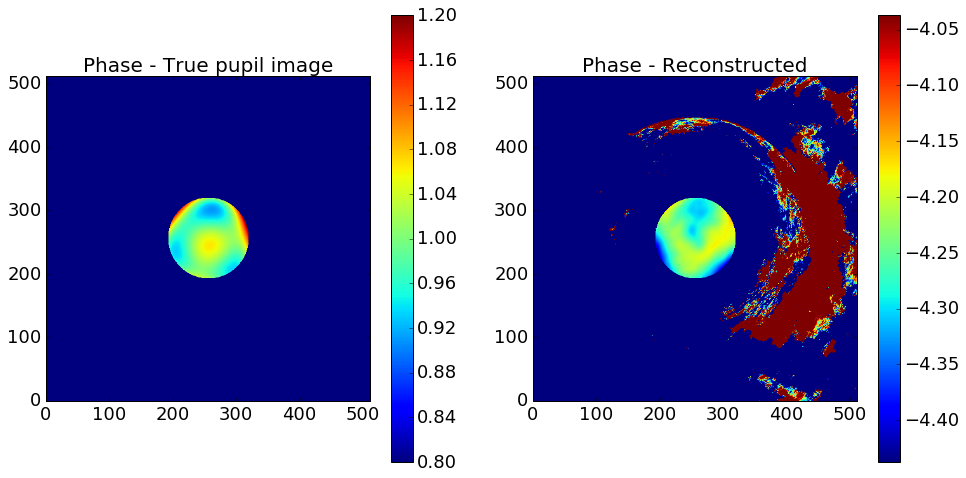

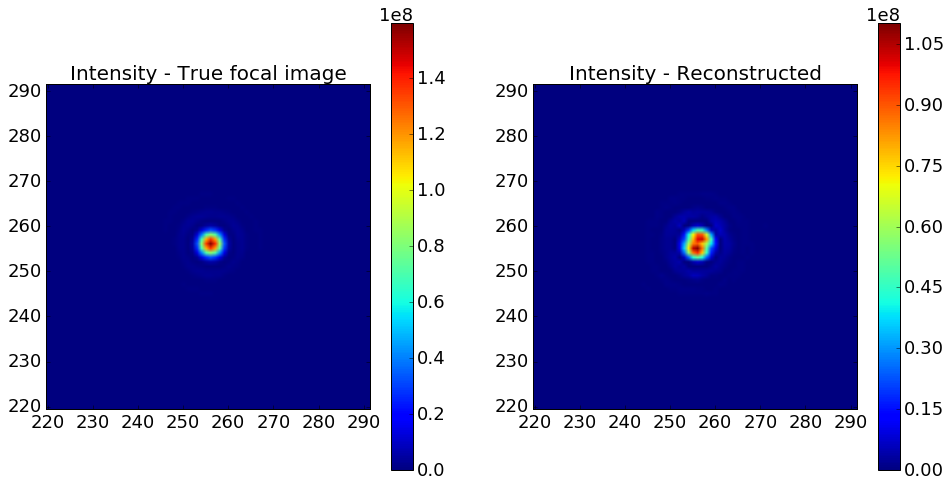

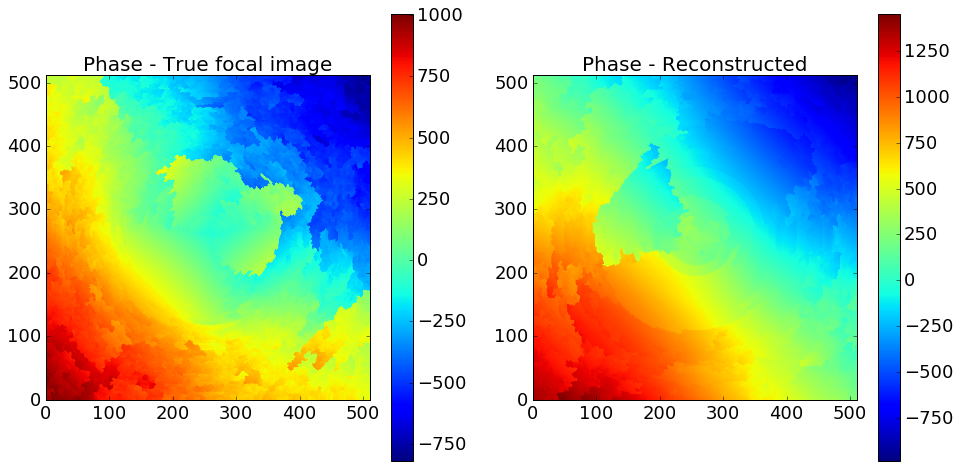

In [94]:
plot_recon(P_,F_,HIO_pup_07,HIO_foc_07,recons_clim=True)

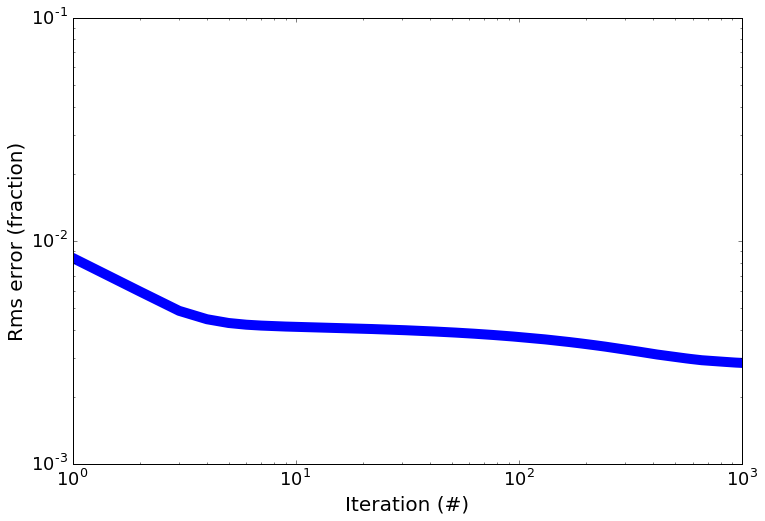

In [95]:
plot_errlist(HIO_errlist_07)

Despite some "fluctuations" remained in the recovered images, $\beta=1$ seems to produce better results. Let's compare the residual phase differences in the object (pupil) domain:

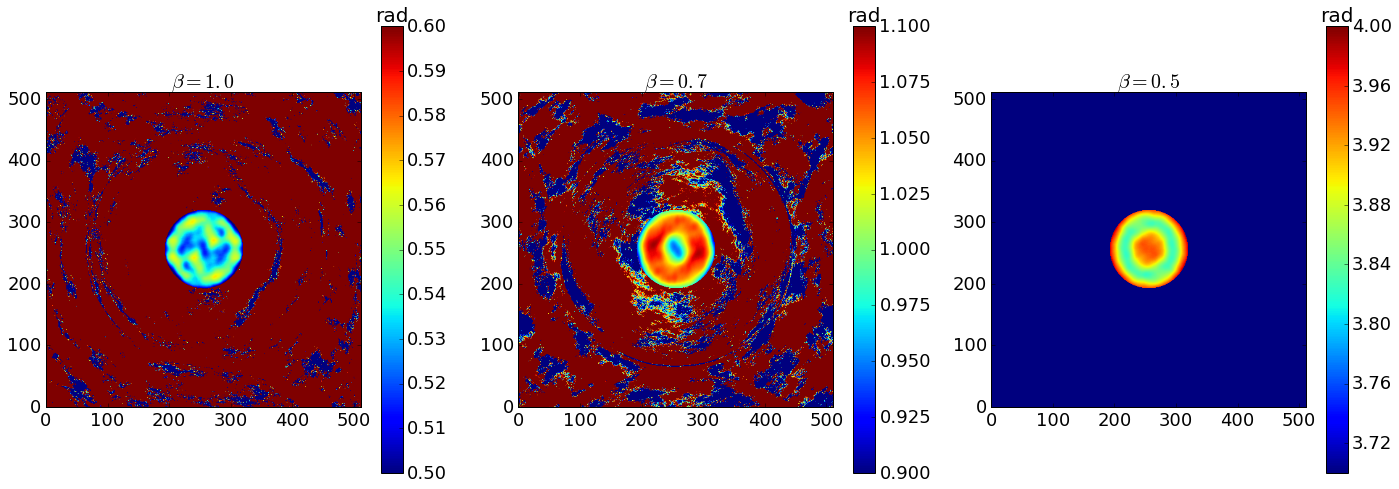

In [113]:
## true
Ppha = np.arctan2(P_.imag,P_.real)
    
## reconstructed (different betas)
rec_puppha_5 = np.arctan2(HIO_pup.imag,HIO_pup.real)
rec_puppha_1 = np.arctan2(HIO_pup_1.imag,HIO_pup_1.real)
rec_puppha_7 = np.arctan2(HIO_pup_07.imag,HIO_pup_07.real)

plt.figure(figsize=(24,8))
plt.subplot(131); plt.imshow(abs(Ppha-rec_puppha_1),origin='lower')
plt.title(r'$\beta=1.0$'); plt.clim(0.5,0.6)
clb = plt.colorbar(); clb.ax.set_title('rad')
plt.subplot(132); plt.imshow(abs(Ppha-rec_puppha_7),origin='lower')
plt.title(r'$\beta=0.7$'); plt.clim(0.9,1.1)
clb = plt.colorbar(); clb.ax.set_title('rad')
plt.subplot(133); plt.imshow(abs(Ppha-rec_puppha_5),origin='lower')
plt.title(r'$\beta=0.5$'); plt.clim(3.7,4.)
clb = plt.colorbar(); clb.ax.set_title('rad')

Very good. Note the color bars -- error remains within $\sim10\%, 20\%,$ and $30\%$ for $\beta=1.0, 0.7, 0.5$ respectively, which are $25\%, 50\%, 75\%$ of the total input aberration.

So far (051117) beating phase diversity, OSS, and their combination

---
#### _Old notes when both amplitude and phase aberrations were presented:_
_Many speculative residuals of $n\pi$ (for integral n). First guess is that taking `abs` value of a complex-valued image does not care about the sign (plus or minus) which stem from factors of $\exp(n\pi)$ in the phases. It is worth exploring how to get rid of this degeneracy. Apart from that, $\beta=1$ looks like the best._